## About the Algorithm
K Nearest Neighbors boils down to proximity, not by group, but by individual points. Thus, all this algorithm is actually doing is computing distance between points, and then picking the most popular class of the top K classes of points nearest to it.  
<br>
There are various ways to compute distance on a plane, many of which you can use here, but the most accepted version is **Euclidean Distance**, named after Euclid, a famous mathematician who is popularly referred to as the father of Geometry.  
<br>
### Euclidean distance is:
<img src="https://pythonprogramming.net/static/images/machine-learning/euclidean-distance.png">  

Lets program it!

In [20]:
import math

plot1 = [1,3]
plot2 = [2,5]

euclidean_distance = math.sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )
print(euclidean_distance)

2.23606797749979


Lets start programming our own K Nearest Neighbor classifier!

Lets import all the necessary modules

In [21]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import style
from math import sqrt
from collections import Counter

## Dataset
Lets create a mini dataset and features.  
Here, the dataset dictionary contains two groups *'k'* and *'r'* (We are naming it as color shorthands, so that it is easier to visualize two colors as two groups). Each group has 3 features (say points in the graph).  
We need to identify to which group our *new_features* belong to.

In [22]:
dataset = {
              'k':[[1,2],[2,3],[3,1]],
              'r':[[6,5],[7,7],[8,6]]
          }

new_features = [5,7]

We can quickly plot it and understand the features visually

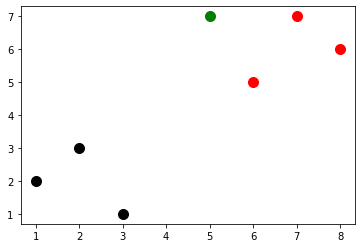

In [23]:
[[plt.scatter(feature[0],feature[1],s=100,color=group) for feature in dataset[group]] for group in dataset]
plt.scatter(new_features[0], new_features[1], s=100, color='g')

plt.show()

## Algorithm

The main downfall of K Nearest Neighbors is that we have to compare the data in question to all of the points from the dataset before we can know what the closest three points are. As such, K Nearest Neighbors performs slower and slower the more data you have.

In [24]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total number of groups!')
    
    # now we will calculate euclidean distances for the predict data with all features
    distances = []
    for group in data:
        for features in data[group]:
        # euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2)
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    # we will sort the array (from shortest to largest distance), consider first 'k' values, and store the groups it belongs to
    # we don't care what the euclidean distance is anymore
    votes = [distance[1] for distance in sorted(distances)[:k]]
    result = Counter(votes).most_common(1)[0][0]    # [*see comments below]
    
    return result

We could have used our version of calculating *euclidean_distance* in the algorithm. But numpy provides a faster and better method to do that. With KNN being a sort of brute-force method for machine learning, we need all the help we can get.  
<br>
[*]Collections finds the most common elements. In our case, we just want the single most common, but we can find the top 3 or top 'x' elements. Without doing the [0][0] part, we get [('r', 3)] (i.e 3 euclidean distances are closer to __'r'__ group). Thus, [0][0] gives us the first element in the tuple. 

Lets do a prediction for the point we plotted earlier

In [25]:
result = k_nearest_neighbors(dataset, new_features)
print(result)

r


Lets plot it all together once again

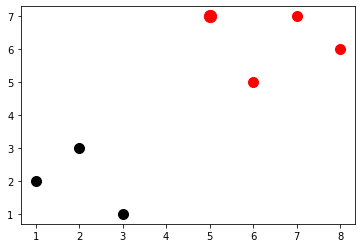

In [26]:
[[plt.scatter(feature[0],feature[1],s=100,color=group) for feature in dataset[group]] for group in dataset]
plt.scatter(new_features[0], new_features[1], s=150, color = result)  # plotting our new feature bigger than others
plt.show()

## Testing
Now, we're going to use the breast cancer dataset to test our custom KNN Algorithm.  
The Scikit-Learn K Nearest Neighbors gave us ~95% accuracy on average, and now we're going to test our own algorithm.

Lets load the data from the file, replace invalid values and convert everything to float type.

In [27]:
df = pd.read_csv('data/breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

Now lets implement our own test-train dataset splitting code.  
First we will shuffle the data and then create training and testing sets.

In [28]:
import random

random.shuffle(full_data)
test_size = 0.2
# train and test set dictionaries with groups as keys (2 - benign, 4 - malignant)
train_set = {2 : [], 4 : []}
test_set = {2 : [], 4 : []}

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

# populating the dictionaries
# remember that last coulmn contains the label (2 or 4)
for row in train_data:
    train_set[row[-1]].append(row[:-1])
    
for row in test_data:
    test_set[row[-1]].append(row[:-1])

Now, lets train and test the data

In [29]:
correct = 0
total = 0

for group in test_set:
    for test_data in test_set[group]:
        result = k_nearest_neighbors(train_set, test_data, k=3)
        if group == result:
            correct += 1
        total += 1
        
print("Accuracy: ", correct/total)


Accuracy:  0.9784172661870504


Now you can perform this test 100 times (by wrapping a for loop around our code) on both the `Scikit-Learn neighbors.KNeighborsClassifier` classifier and our custom-made classifier and find out that the average accuracy of both the algorithms is identical, with around 0.97, or 97%, accuracy.  
Although with respect to speed, `Scikit-Learn neighbors.KNeighborsClassifier` is around 10 times faster than our custom classifier.

Finally, one last point about actual prediction confidence.  
There are two ways to measure confidence. 
 1. One way is by comparing how many examples we got correct vs incorrect in the testing stage.
 2. Another way, is by checking the vote percentage.  
 For example, our overall algorithm may be 97% accurate, but on some of the classifications the votes may have been 3 to 2. While 3 is the majority, it's only 60% vote rather than 100% which would be ideal. In terms of telling someone whether or not they have breast cancer, we probably prefer 100%!  
 Thus, in the case of 60% vote on a 97% accurate classifier, we can be 97% sure that we are only 60% certain about your classification. It's totally possible that this 60% vote is responsible for part of the 3% that was inaccurately measured.